In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder



import seaborn as sns

In [259]:
# Load train.csv data
train_df = pd.read_csv("/Users/sa18/Desktop/House_Price/Data/train.csv")

### Step 1: Drop Columns

In [260]:
kept_cols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars', 'SalePrice',
             'ExterQual', 'BsmtQual', 'KitchenQual']

In [261]:
train_df = train_df[kept_cols]

### Step 2: Handle Missing Values

In [262]:
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Columns with missing values:\n", missing)

Columns with missing values:
 BsmtQual    37
dtype: int64


In [263]:
# separate numerical and categorical data
numeric_cols = train_df.select_dtypes(include=["int64", "float64"]).columns

categorical_cols = train_df.select_dtypes(include=["object"]).columns


In [264]:
# Fill numerical columns with 0
train_df[numeric_cols] = train_df[numeric_cols].fillna(0)

train_df[numeric_cols]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,7,2003,2003,856,1710,2,2,208500
1,6,1976,1976,1262,1262,2,2,181500
2,7,2001,2002,920,1786,2,2,223500
3,7,1915,1970,756,1717,1,3,140000
4,8,2000,2000,1145,2198,2,3,250000
...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,1647,2,2,175000
1456,6,1978,1988,1542,2073,2,2,210000
1457,7,1941,2006,1152,2340,2,1,266500
1458,5,1950,1996,1078,1078,1,1,142125


In [265]:
# Fill categorical columns with 'None'
train_df[categorical_cols] = train_df[categorical_cols].fillna("None")

train_df[categorical_cols]

,ExterQual,BsmtQual,KitchenQual
0,Gd,Gd,Gd
1,TA,Gd,TA
2,Gd,Gd,Gd
3,TA,TA,Gd
4,Gd,Gd,Gd
...,...,...,...
1455,TA,Gd,TA
1456,TA,Gd,TA
1457,Ex,TA,Gd
1458,TA,TA,Gd


### Step 3: Log Transform Target Variable `SalePrice`

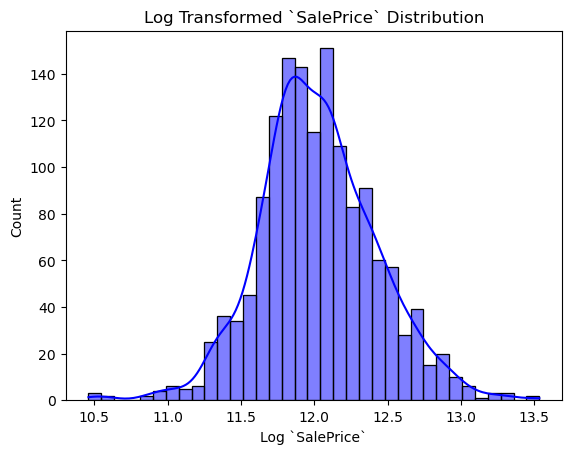

In [266]:
# `SalePrice` is right skewed, so it needs to be normally distributed before we can move on to machine learning. 
# Apply log scale to transform the target variable (`SalePrice`)

#target = np.log(train_df['SalePrice'])


target = train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

sns.histplot(target, kde = True, color = 'b')
plt.title("Log Transformed `SalePrice` Distribution")
plt.xlabel("Log `SalePrice`")
plt.ylabel("Count")
plt.show()


`SalePrice` now has a more normal distribution. 

In [267]:
train_df.dtypes

OverallQual       int64
YearBuilt         int64
YearRemodAdd      int64
TotalBsmtSF       int64
GrLivArea         int64
FullBath          int64
GarageCars        int64
SalePrice       float64
ExterQual        object
BsmtQual         object
KitchenQual      object
dtype: object

In [268]:
for col in ["ExterQual", "BsmtQual", "KitchenQual"]: train_df[col] = train_df[col].astype(str)

# Encode Categorical Features for use in modeling
quality_order = ["None", "Po", "Fa", "TA", "Gd", "Ex"]

encoder = OrdinalEncoder(categories=[quality_order, quality_order, quality_order])

train_df[["ExterQual", "BsmtQual", "KitchenQual"]] = encoder.fit_transform(
    train_df[["ExterQual", "BsmtQual", "KitchenQual"]]
    )

### Step 4: Save Cleaned DataFrame

In [270]:
train_df. to_csv("/Users/sa18/Desktop/House_Price/Data/cleaned_train.csv", index=False)

# show size of new data
train_df.shape

(1460, 11)

The cleaned training dataset has 11 columns and 1460 rows.